In [25]:
import numpy as np
import matplotlib.pylab as plt
from matplotlib.ticker import MultipleLocator
%matplotlib inline

In [26]:
#List of temperatures as floats and strings
temp1 = [ 290., 292.5, 295., 297.5, 300., 302.5, 305., 307.5, 310.]
stemp1 = ["290", "292.5", "295", "297.5", "300", "302.5", "305", "307.5", "310"]
t = len( temp1 )

Lv = 2.5 * 10. ** 6
day = 24. * 60. * 60.

In [35]:
#Some functions
def calc_precip_eff( z, rho, Qc, pr ):

    Qc /= 1000. 

    pr *= Lv / day  #convert to energy units

    Qc *= rho
    Qc = np.trapz( Qc, z ) * Lv 

    precip_eff = pr / Qc

    return precip_eff


def make_axis( ax ):

    majorLocator = MultipleLocator(5)
    minorLocator = MultipleLocator(2.5)

    ax.tick_params( axis = 'x', which = 'both', bottom="on", top = "off", labelbottom = "on", direction = 'out')                  
    ax.tick_params( axis = 'y', which = 'both', bottom="off", top="off",  labelbottom="off", left="on", right="off", labelleft="on", direction = 'out')                                                                                        

    ax.tick_params(length = 5, which = 'both')

    ax.spines["top"].set_visible(False)    
    ax.spines["right"].set_visible(False) 

    ax.xaxis.set_major_locator(majorLocator)
    ax.xaxis.set_minor_locator(minorLocator)

    return ax

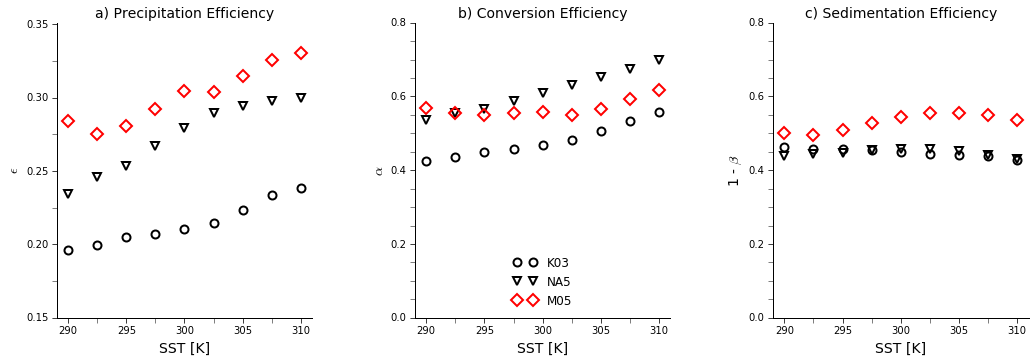

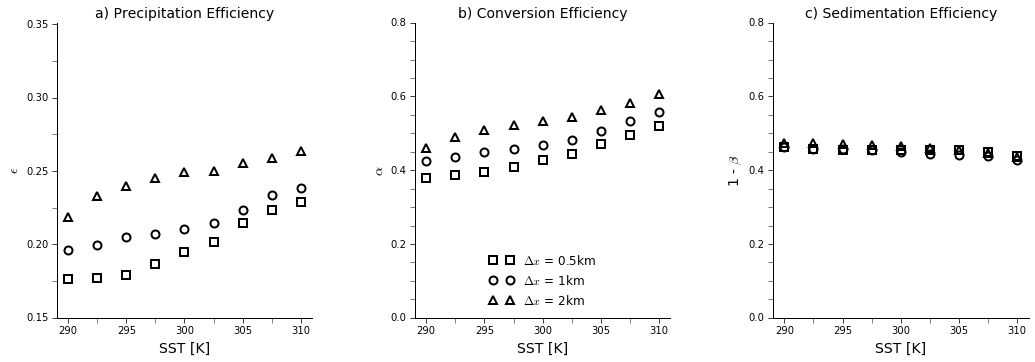

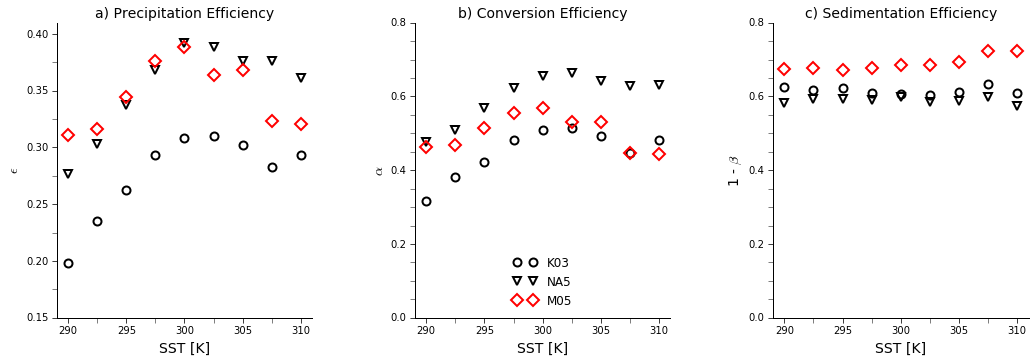

In [42]:
fname = ["small_domain_micro", "small_domain_res", "2D_mock_walker"]

#Make plots for 3 different cases: the basic small domain simulations, the resolution comparison and the 2D walker simulations

for h in range( 3 ): 
    p_eff = np.zeros( ( 3, t ) )
    reevap = np.zeros( ( 3, t ) )
    detrainment = np.zeros( ( 3, t ) )
    c0 = np.zeros( ( 3, t ) )

    z = np.load( "data/" + fname[h] + "_z.dat")
    rho = np.load( "data/" + fname[h] + "_rho.dat")
    qc = np.load( "data/" + fname[h] + "_con.dat")
    precip = np.load( "data/" + fname[h] + "_precip.dat")
    reevap = -np.load( "data/" + fname[h] + "_qevp.dat") * rho / day / 1000.

    con = np.trapz( rho * qc, z) / 1000.
    
    for j in range( 3 ):
        for i in range( t ):           
            p_eff[j, i] = calc_precip_eff( z[j, i], rho[j, i], qc[j, i], precip[j, i] )
            c0[j, i] = p_eff[j, i] + np.trapz(reevap[j, i], z[j, i] ) / con[j, i] #Calculate condensation efficiency as residual, but can also calculate directly from SAM outputs
            
    #Now plot:
    fig = plt.figure( figsize = (15, 5) )
    plt.subplots_adjust(left = 0.07, right = 0.97, bottom = 0.13, top = 0.95, hspace = 0.4, wspace = 0.4)

    ax1 = plt.subplot(1, 3, 1 )
    plt.title( "a) Precipitation Efficiency", fontsize = 14 )

    cs = ['ko', 'rD']
    cs2 = ['k', 'r']

    if h == 0:
        label = ["K03", "NA5", "M05"]
    elif h == 1:
        label = ["$\Delta x$ = 0.5km", "$\Delta x$ = 1km", "$\Delta x$ = 2km"]
    elif h == 2:
        label = ["K03", "NA5", "M05"]

    if h == 1:
        ms = ['s', 'o', '^' ]
    else:
        ms = ['o', 'v', 'D' ]

    for i in range( 3 ):
        if h != 1 and i == 2: #Morrison scheme in red
            plt.plot( temp1[:], p_eff[i], ms[i], markerfacecolor = 'None', markeredgecolor = 'r', markeredgewidth = 2., markersize = 8, label = label[i] )
        else:
            plt.plot( temp1[:], p_eff[i], ms[i], markerfacecolor = 'None', markeredgecolor = 'k', markeredgewidth = 2., markersize = 8, label = label[i] )

    make_axis( ax1 )

    plt.xlim([289., 311.])
    if h < 2:
        plt.ylim([0.15, 0.351])
    else:
        plt.ylim([0.15, 0.41])

    majorLocator = MultipleLocator(0.05)
    minorLocator = MultipleLocator(0.025)
    ax1.yaxis.set_major_locator(majorLocator)
    ax1.yaxis.set_minor_locator(minorLocator)

    plt.xlabel( "SST [K]", fontsize = 14 )
    plt.ylabel( "$\epsilon$", fontsize = 14 )

    ax1 = plt.subplot(1, 3, 2 )
    plt.title( "b) Conversion Efficiency", fontsize = 14 )

    for i in range( 3 ):
        if h != 1 and i == 2:  #Morrison scheme in red
            plt.plot( temp1[:], c0[i], ms[i], markerfacecolor = 'None', markeredgecolor = 'r', markeredgewidth = 2., markersize = 8, label = label[i] )
        else:
            plt.plot( temp1[:], c0[i], ms[i], markerfacecolor = 'None', markeredgecolor = 'k', markeredgewidth = 2., markersize = 8, label = label[i] )

    make_axis( ax1 )

    plt.legend(loc = "lower center", frameon = False)

    plt.xlim([289., 311.])
    plt.ylim([0., 0.8])

    plt.xlabel( "SST [K]", fontsize = 14 )
    plt.ylabel( "$\\alpha$", fontsize = 14 )

    majorLocator = MultipleLocator(0.2)
    minorLocator = MultipleLocator(0.05)
    ax1.yaxis.set_major_locator(majorLocator)
    ax1.yaxis.set_minor_locator(minorLocator)

    ax1 = plt.subplot(1, 3, 3 )
    plt.title( "c) Sedimentation Efficiency", fontsize = 14 )

    reevap = np.trapz(reevap, z ) / c0 / con  #Normalize re-evaporation

    for i in range( 3 ):
        if h != 1 and i == 2:  #Morrison scheme in red
            plt.plot( temp1[:], 1. - reevap[i], ms[i], markerfacecolor = 'None', markeredgecolor = 'r', markeredgewidth = 2., markersize = 8, label = label[i] )
        else:
            plt.plot( temp1[:], 1. - reevap[i], ms[i], markerfacecolor = 'None', markeredgecolor = 'k', markeredgewidth = 2., markersize = 8, label = label[i] )

    make_axis( ax1 )

    plt.xlim([289., 311.])
    plt.ylim([0., 0.6])

    plt.xlabel( "SST [K]", fontsize = 14 )
    plt.ylabel( "1 - $\\beta$", fontsize = 14 )

    plt.xlim([289., 311.])
    plt.ylim([0., 0.8])

    majorLocator = MultipleLocator(0.2)
    minorLocator = MultipleLocator(0.05)
    ax1.yaxis.set_major_locator(majorLocator)
    ax1.yaxis.set_minor_locator(minorLocator)

    plt.show()